# Natural Language Processing

## Exercise Sheet 2

In [1]:
#imports for all exercises
import nltk
import matplotlib.pylab as plt
from nltk.corpus import brown, inaugural, names, stopwords, udhr, wordnet as wn

In [3]:
# scale all plots accordingly
plt.rcParams['figure.figsize'] = [15,6]

### Exercise 1

Plot the conditional frequency distribution of how the usage of the words "men", "women", and "people" has changed over time in the Inaugural Address Corpus.


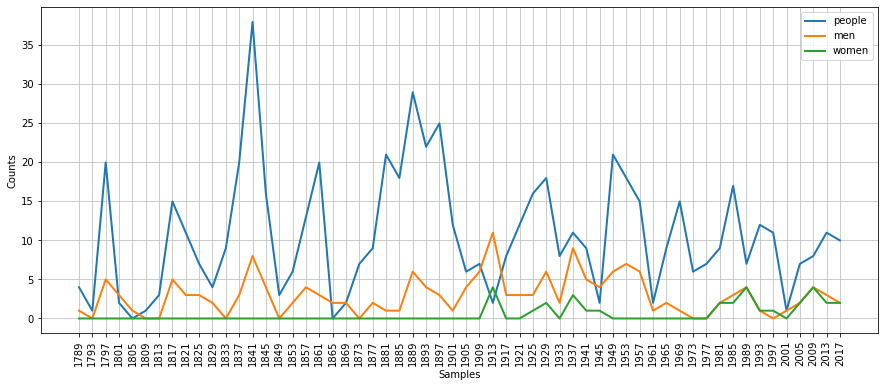

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
cfd = nltk.ConditionalFreqDist(
    (cond, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for cond in ["men", "women", "people"]
    if word.lower().startswith(cond)
)

cfd.plot()

### Exercise 2

Plot a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are more frequent for males vs. females.

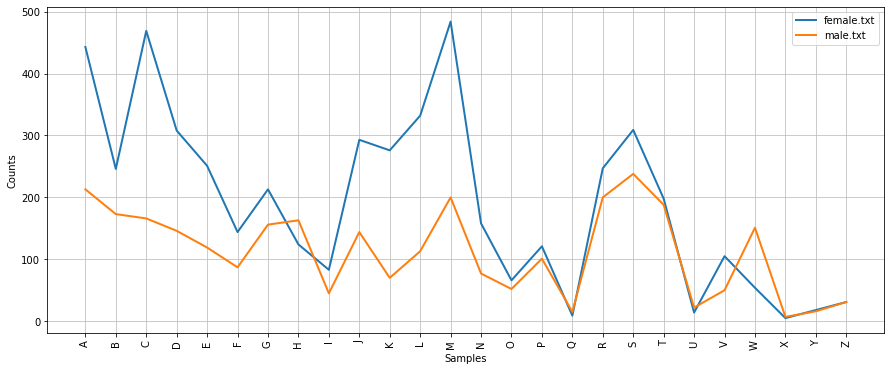

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [42]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[:1])
    for fileid in names.fileids()
    for name in names.words(fileid)
)

cfd.plot()

### Exercise 3

What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [29]:
no_hyponym_nouns = [ synset for synset in wn.all_synsets('n') if len(synset.hyponyms()) == 0 ]

print("Percentage of noun synsets with no hyponyms: ", round(len(no_hyponym_nouns) / len(list(wn.all_synsets('n'))), 3), "%")

Percentage of noun synsets with no hyponyms:  0.797 %


### Exercise 4

Define a function `supergloss(s)` that takes a synset $s$ as its argument and returns a string consisting of the concatenation of the definition of $s$, and the definitions of all the hypernyms and hyponyms of $s$. Apply the function to the synset "car.n.01".

In [45]:
def supergloss(s):
    string = s.definition() + "\n"

    for hyper in s.hypernyms():
        string += "\n" + hyper.definition() 

    string += "\n"

    for hypo in s.hyponyms():
        string += "\n" + hypo.definition()

    return string

print( supergloss(wn.synset('car.n.01')) )

a motor vehicle with four wheels; usually propelled by an internal combustion engine

a self-propelled wheeled vehicle that does not run on rails

a vehicle that takes people to and from hospitals
a car that has a long body and rear door with space behind rear seat
a car that is old and unreliable
a car driven by a person whose job is to take passengers where they want to go in exchange for money
a small and economical car
a car that has top that can be folded or removed
a car with two doors and front seats and a luggage compartment
a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters
a car that is powered by electricity
a car with relatively low fuel efficiency
a car that resembles a convertible but has a fixed rigid top
a car having a hatchback door
an early term for an automobile
a car modified to increase its speed and acceleration
a car suitable for traveling over rough terrain
large luxurious car; usually driven by a chauffeur


### Exercise 5

Define a function to find all words that occur at least $n$ times in the Brown Corpus. Call the function with the value $n=200$.

In [135]:

# we take a case-insensitive approach and filter out tokens which are not alphabetic
def find_word_with_min_occurances(n):
    dist = nltk.FreqDist(w.lower() for w in brown.words() if w.isalpha())
    return sorted(w for w in dist if dist[w] >= n)

find_word_with_min_occurances(200)

['a',
 'able',
 'about',
 'above',
 'across',
 'act',
 'action',
 'af',
 'after',
 'again',
 'against',
 'age',
 'ago',
 'air',
 'all',
 'almost',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'american',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anything',
 'are',
 'area',
 'areas',
 'around',
 'art',
 'as',
 'asked',
 'at',
 'available',
 'away',
 'back',
 'be',
 'became',
 'because',
 'become',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'believe',
 'best',
 'better',
 'between',
 'big',
 'black',
 'board',
 'body',
 'both',
 'boy',
 'brought',
 'business',
 'but',
 'by',
 'called',
 'came',
 'can',
 'cannot',
 'car',
 'case',
 'center',
 'century',
 'certain',
 'change',
 'child',
 'children',
 'church',
 'city',
 'class',
 'clear',
 'close',
 'college',
 'come',
 'common',
 'community',
 'company',
 'control',
 'cost',
 'could',
 'country',
 'course',
 'court',
 'day',
 'days',
 'death',
 'department',
 'development',
 'did',
 'different',
 'do',
 'do

### Exercise 6

Write a program that lists the lexical diversity scores for all Brown Corpus genres, one per line.


In [6]:
def lexical_diversity_percent(words):
    return len(set(w.lower() for w in words)) / len( [w.lower() for w in words] ) * 100

In [7]:
print("Lexical Diversity Scores for different Genres of the Brown Corpus in Percent, rouded to first decimal place:")
for genre in brown.categories():
    div_score = lexical_diversity_percent(brown.words(categories=genre))
    print(genre, ":", round(div_score, 1), "%")

Lexical Diversity Scores for different Genres of the Brown Corpus in Percent, rouded to first decimal place:
adventure : 12.0 %
belles_lettres : 9.9 %
editorial : 14.8 %
fiction : 12.7 %
government : 10.5 %
hobbies : 13.1 %
humor : 21.9 %
learned : 8.5 %
lore : 12.2 %
mystery : 11.3 %
news : 13.0 %
religion : 15.1 %
reviews : 19.8 %
romance : 11.3 %
science_fiction : 21.0 %


### Exercise 7

Write a function that finds the 50 most frequently occurring words of a text that are not stopwords. Apply the function to the "news" genre of the Brown Corpus. 



In [9]:
# we take a case-insensitive approach and filter out tokens which are not alphabetic
def most_freq_non_stopword(text):
    stopwords_e = stopwords.words("english")
    dist = nltk.FreqDist([w.lower() for w in text if w.lower() not in stopwords_e and w.isalpha()])
    return dist.most_common(50)

most_freq_non_stopword(brown.words(categories="news"))

[('said', 406),
 ('would', 246),
 ('new', 241),
 ('one', 213),
 ('last', 177),
 ('two', 174),
 ('first', 158),
 ('state', 153),
 ('year', 142),
 ('president', 142),
 ('home', 132),
 ('also', 129),
 ('made', 107),
 ('time', 103),
 ('years', 102),
 ('three', 101),
 ('house', 97),
 ('week', 94),
 ('city', 93),
 ('may', 93),
 ('school', 87),
 ('could', 87),
 ('four', 82),
 ('day', 76),
 ('committee', 75),
 ('man', 74),
 ('members', 74),
 ('back', 73),
 ('government', 73),
 ('many', 72),
 ('national', 72),
 ('university', 70),
 ('bill', 69),
 ('get', 68),
 ('high', 68),
 ('work', 67),
 ('since', 67),
 ('american', 67),
 ('program', 66),
 ('kennedy', 66),
 ('night', 65),
 ('john', 65),
 ('board', 64),
 ('administration', 62),
 ('meeting', 62),
 ('county', 61),
 ('per', 61),
 ('even', 61),
 ('states', 60),
 ('tax', 58)]

### Exercise 8

Write a function that finds the 50 most frequently occurring bigrams of a text, omitting bigrams that contain stopwords. Apply the function to the "news" genre of the Brown Corpus. 


In [11]:
# we take a case-insensitive approach and filter out tokens which are not alphabetic
def most_freq_bigrams_non_stopword(text):
    stopwords_e = stopwords.words("english")
    bigram_list = list(nltk.bigrams(text))
    dist = nltk.FreqDist([ (b[0].lower(), b[1].lower()) for b in bigram_list if b[0].lower() not in stopwords_e and b[1].lower() not in stopwords_e and b[0].isalpha() and b[1].isalpha() ])
    return dist.most_common(50)

most_freq_bigrams_non_stopword(brown.words(categories="news"))

[(('new', 'york'), 52),
 (('per', 'cent'), 50),
 (('united', 'states'), 37),
 (('last', 'week'), 35),
 (('last', 'year'), 34),
 (('white', 'house'), 29),
 (('high', 'school'), 23),
 (('home', 'runs'), 23),
 (('president', 'kennedy'), 19),
 (('last', 'night'), 18),
 (('years', 'ago'), 15),
 (('san', 'francisco'), 15),
 (('premier', 'khrushchev'), 13),
 (('kansas', 'city'), 13),
 (('vice', 'president'), 12),
 (('los', 'angeles'), 12),
 (('united', 'nations'), 11),
 (('new', 'orleans'), 11),
 (('police', 'said'), 11),
 (('sales', 'tax'), 10),
 (('two', 'years'), 10),
 (('american', 'catholic'), 10),
 (('el', 'paso'), 9),
 (('social', 'security'), 9),
 (('kennedy', 'administration'), 9),
 (('first', 'time'), 9),
 (('country', 'club'), 9),
 (('rules', 'committee'), 9),
 (('air', 'force'), 9),
 (('tax', 'bill'), 9),
 (('grand', 'jury'), 8),
 (('jury', 'said'), 8),
 (('city', 'council'), 8),
 (('would', 'like'), 8),
 (('rhode', 'island'), 8),
 (('weeks', 'ago'), 8),
 (('american', 'league'), 

### Exercise 9

Write a function `word_freq()` that takes a word and the name of a Brown Corpus genre as arguments, and computes the frequency of the word in that section of the corpus. Use the function to compute the frequency of "love" in "news" vs. "romance" genre.

In [12]:
# we take a case-insensitive approach
def word_freq(search_word, genre):
    words = brown.words(categories=genre)
    dist = nltk.FreqDist(w.lower() for w in words)
    print(dist[search_word])

In [142]:
word_freq('love', 'news')
word_freq('love', 'romance')

3
36


### Exercise 10

Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the Universal Declaration of Human Rights Corpus and limit your searches to files in the Latin-1 encoding. Use the function to find the languages for the string "basis".


In [13]:
# we take a case-insensitive approach for both the search word and the udhr
def find_language(word):
    latin_languages = [ lan for lan in udhr.fileids() if lan.endswith("Latin1") ]
    return [ lang for lang in latin_languages if word.lower() in [ w.lower() for w in udhr.words(lang)] ]

find_language("basis")

['Afrikaans-Latin1', 'English-Latin1', 'Luxembourgish_Letzebuergeusch-Latin1']

### Exercise 11

What is the branching factor of the noun hypernym hierarchy, i.e. for every noun synset that has hyponyms, how many do they have on average? 

In [52]:
synsets_with_hypo = [ synset for synset in wn.all_synsets('n') if len(synset.hyponyms()) != 0 ]
hypo_count = sum(len(synset.hyponyms()) for synset in synsets_with_hypo)

result = hypo_count / len(synsets_with_hypo)

print("Branching factor of the noun hypernym hierarchy:", round(result, 4) )

Branching factor of the noun hypernym hierarchy: 4.5438
